In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
%matplotlib inline

In [2]:
fx_spot = pd.read_csv('FX_spot.csv', parse_dates=['DATE'], index_col='DATE').loc[:, ['GBP', 'EUR']].sort_index()
fx_spot.rename(fx_spot.columns.to_series().str.lower(), axis=1, inplace=True)

fx_spot

,gbp,eur
DATE,,
2016-11-01,0.816793,0.904527
2016-11-02,0.812810,0.901185
2016-11-03,0.802439,0.900455
2016-11-04,0.798786,0.897827
2016-11-07,0.806582,0.905756
...,...,...
2019-06-24,0.784899,0.877347
2019-06-25,0.787464,0.879740
2019-06-26,0.788022,0.879546


In [3]:
df = fx_spot.copy()

In [4]:
# return
R = df.shift(-1) / df
R.rename(dict([(x, 'r_'+x) for x in fx_spot.columns]), axis=1, inplace=True)
df = df.join(R)

df

,gbp,eur,r_gbp,r_eur
DATE,,,,
2016-11-01,0.816793,0.904527,0.995123,0.996305
2016-11-02,0.812810,0.901185,0.987241,0.999190
2016-11-03,0.802439,0.900455,0.995447,0.997082
2016-11-04,0.798786,0.897827,1.009760,1.008831
2016-11-07,0.806582,0.905756,1.001414,1.001315
...,...,...,...,...
2019-06-24,0.784899,0.877347,1.003268,1.002727
2019-06-25,0.787464,0.879740,1.000709,0.999780
2019-06-26,0.788022,0.879546,1.001065,0.999956


In [5]:
# random weights
W = np.random.rand(fx_spot.size).reshape(fx_spot.shape)
W = pd.DataFrame(
        W / np.expand_dims(W.sum(axis=-1), -1),
        index=fx_spot.index,
        columns=['w_'+x for x in fx_spot.columns]
)
df = df.join(W)

df

,gbp,eur,r_gbp,r_eur,w_gbp,w_eur
DATE,,,,,,
2016-11-01,0.816793,0.904527,0.995123,0.996305,0.575517,0.424483
2016-11-02,0.812810,0.901185,0.987241,0.999190,0.497948,0.502052
2016-11-03,0.802439,0.900455,0.995447,0.997082,0.473923,0.526077
2016-11-04,0.798786,0.897827,1.009760,1.008831,0.853418,0.146582
2016-11-07,0.806582,0.905756,1.001414,1.001315,0.449655,0.550345
...,...,...,...,...,...,...
2019-06-24,0.784899,0.877347,1.003268,1.002727,0.805778,0.194222
2019-06-25,0.787464,0.879740,1.000709,0.999780,0.169022,0.830978
2019-06-26,0.788022,0.879546,1.001065,0.999956,0.785898,0.214102


In [6]:
W_ = W.values
R_ = R.values
df['r_overall'] = (W_ * R_).sum(axis=1)

df

,gbp,eur,r_gbp,r_eur,w_gbp,w_eur,r_overall
DATE,,,,,,,
2016-11-01,0.816793,0.904527,0.995123,0.996305,0.575517,0.424483,0.995625
2016-11-02,0.812810,0.901185,0.987241,0.999190,0.497948,0.502052,0.993240
2016-11-03,0.802439,0.900455,0.995447,0.997082,0.473923,0.526077,0.996307
2016-11-04,0.798786,0.897827,1.009760,1.008831,0.853418,0.146582,1.009624
2016-11-07,0.806582,0.905756,1.001414,1.001315,0.449655,0.550345,1.001359
...,...,...,...,...,...,...,...
2019-06-24,0.784899,0.877347,1.003268,1.002727,0.805778,0.194222,1.003163
2019-06-25,0.787464,0.879740,1.000709,0.999780,0.169022,0.830978,0.999937
2019-06-26,0.788022,0.879546,1.001065,0.999956,0.785898,0.214102,1.000828


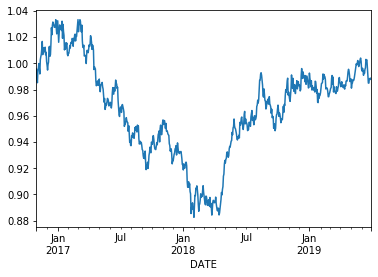

In [7]:
df['r_overall'].cumprod().plot()